# Purpose
Shuffle dataset as flat as possible.

In [1]:
#!pip install iterative-stratification

# Library and Data Loading

In [2]:
import numpy as np
import pandas as pd
import os
import gc
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold
from glob import glob
from tqdm import tqdm

In [3]:
#input_dir = '../../04_LearningPrediction/inputs/'
input_dir = 'inputs/'
seed = 30
n_fold = 10
n_bins = 30
np.random.seed(seed)

In [4]:
def load_npy(ind):
    with open(input_dir + f'preprocessed/{ind}.npy', 'rb') as f:
        xy = np.load(f)
    xy[np.isnan(xy)] = -1
    return xy

# Stratified K-fold
There are many variables, so it is important to shuffle each variable equivalently to avoid fitting the model to the biasely shuffled data.  
--> iterative-stratification

In [5]:
def get_folds(data, seed = seed, n_fold = n_fold, n_bins = n_bins):
    np.random.seed(seed)
    fold_inds = np.zeros(len(xy))
    xy_qcut = np.zeros(np.shape(xy), int)
    rand = np.random.rand(len(xy))*0.001
    for i in range(0, len(xy[0])):
        xy_qcut[:,i] = pd.qcut(xy[:,i]+rand, n_bins, labels = False)

    mskf = MultilabelStratifiedKFold(n_splits=n_fold, random_state = seed, shuffle = True)
    for i, (_, test_index) in enumerate(mskf.split(np.zeros(len(xy)), xy_qcut)):
        fold_inds[test_index] = i
    del xy_qcut, rand
    gc.collect()    
    return fold_inds

In [6]:
xy = load_npy(1)
fold_inds = get_folds(xy)

Labels
col0


/tmp/ipykernel_23873/2154232477.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, n_fold, i+1)
/tmp/ipykernel_23873/2154232477.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, n_fold, i+1)


col100
col200


/tmp/ipykernel_23873/2154232477.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, n_fold, i+1)
/tmp/ipykernel_23873/2154232477.py:22: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, n_fold, i+1)


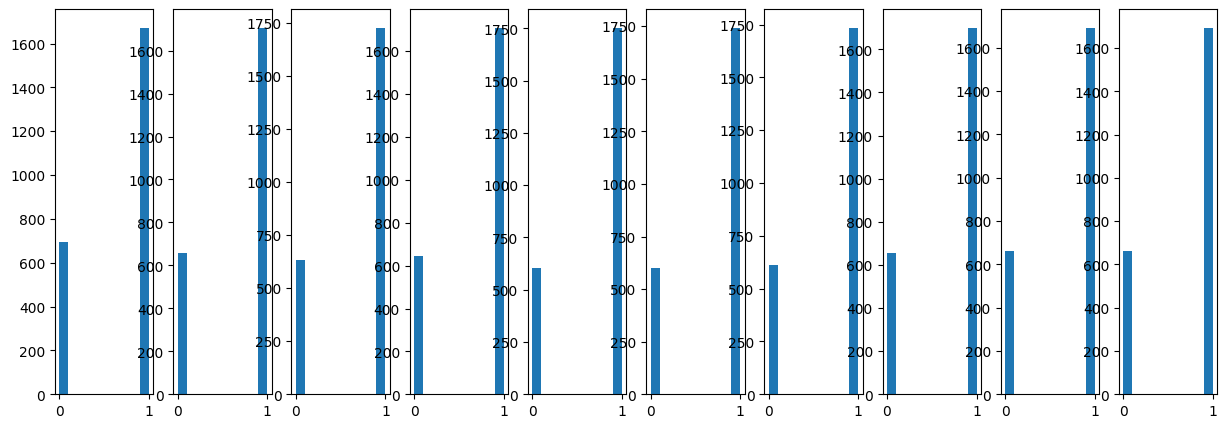

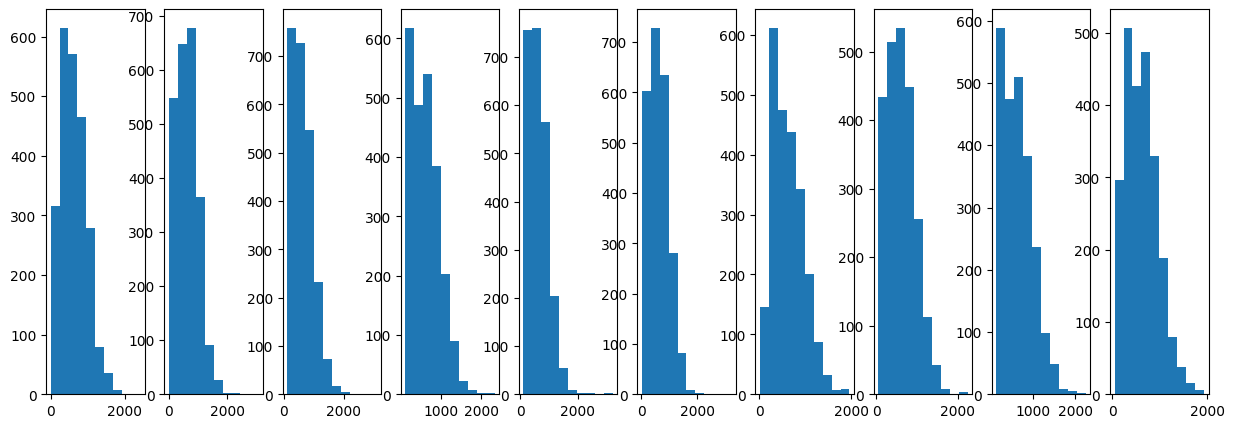

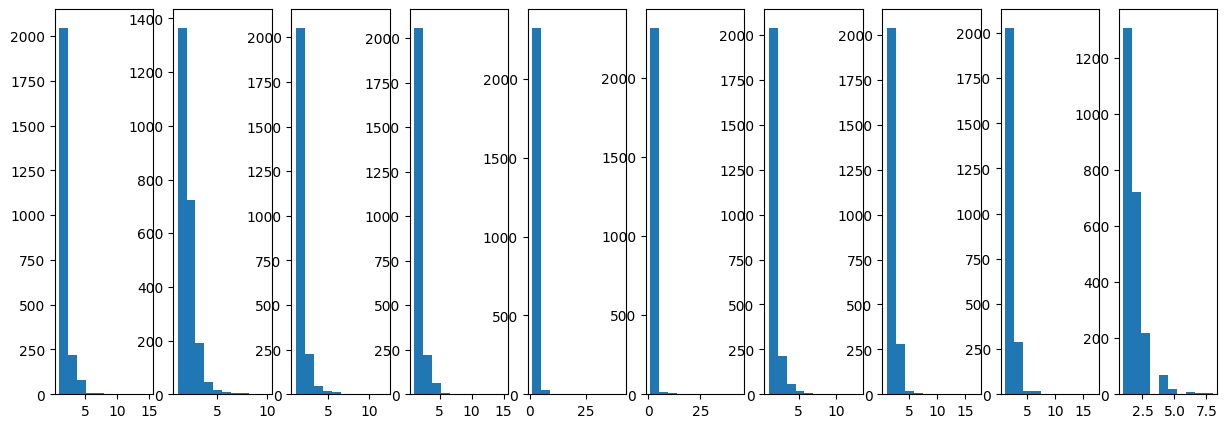

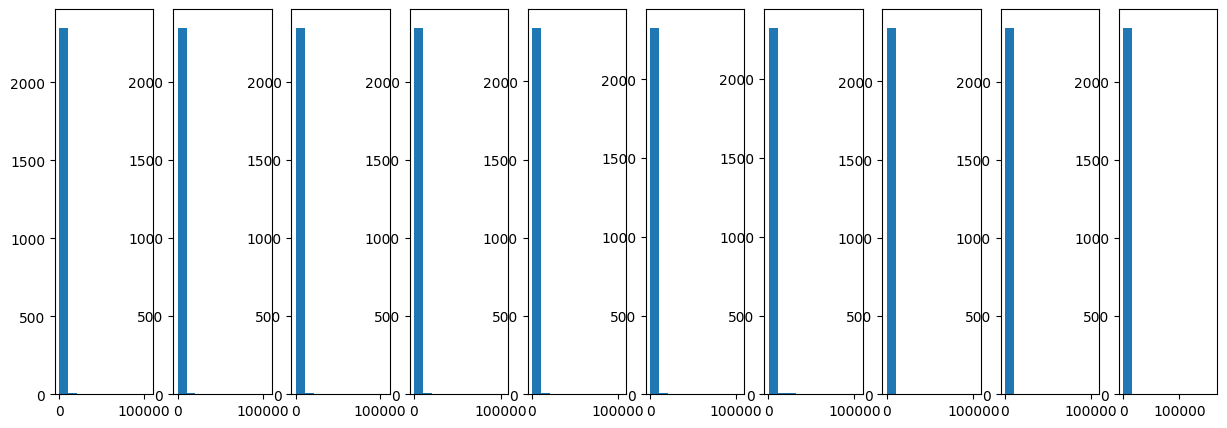

In [7]:
print('Labels')
f, axs = plt.subplots(1, 5, figsize=(15, 5))
for i in range(0, n_fold):
    plt.subplot(1, n_fold, i+1)
    plt.hist(xy[fold_inds==i,-1], label='bins=10')

print('col0')
f, axs = plt.subplots(1, 5, figsize=(15, 5))
for i in range(0, n_fold):
    plt.subplot(1, n_fold, i+1)
    plt.hist(xy[fold_inds==i,0], label='bins=10')
    
print('col100')
f, axs = plt.subplots(1, 5, figsize=(15, 5))
for i in range(0, n_fold):
    plt.subplot(1, n_fold, i+1)
    plt.hist(xy[fold_inds==i,100], label='bins=10')
    
print('col200')
f, axs = plt.subplots(1, 5, figsize=(15, 5))
for i in range(0, n_fold):
    plt.subplot(1, n_fold, i+1)
    plt.hist(xy[fold_inds==i,200], label='bins=10')

In [8]:
data_list = glob(input_dir + 'preprocessed/*data.npy')

In [9]:
try:
    os.makedirs(input_dir + f'preprocessed/{n_fold}fold')
except:
    print('Directory already exists!')
for i in tqdm(range(0, len(data_list))):
    tmp = data_list[i].split('/')
    ind = int(tmp[-1].split('_')[0])
    
    xy = load_npy(ind)
    fold_inds = get_folds(xy)
    fold_inds = fold_inds.astype(int)
    
    with open(input_dir + f'preprocessed/{n_fold}fold/{ind}_fold.npy', 'wb') as f:
        np.save(f, fold_inds)

Directory already exists!


0it [00:00, ?it/s]


In [10]:
max_col_len = 0
for i in range(0, len(data_list)):
    tmp = data_list[i].split('/')
    ind = int(tmp[-1].split('_')[0])
    xy = load_npy(ind)
    print(len(xy[0]))
    max_col_len = max(len(xy[0]), max_col_len)
    
print(f'Maximum column size: {max_col_len}')

Maximum column size: 0
